## Student Performance Indicator

### Problem Statement
This project understand how the student's performance (test score) is affected by other variables such as Gender, Ethnicity,parental_level_of_education,etc



In [1]:
# import required all librarires 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the csv file
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_eucation,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#shape
df.shape

(1000, 8)

## Data checks to perform 
- check missing values
- check duplicate 
- check data types
- check the number of uniuqe values of each cols
- check statistics of data set
- check various categories present in different categorical cols

In [5]:
#missing values
df.isna().sum()

gender                        0
race_ethnicity                0
parental_level_of_eucation    0
lunch                         0
test_preparation_course       0
math_score                    0
reading_score                 0
writing_score                 0
dtype: int64

Inference: There are no missing values in the dataset 

In [6]:
#duplicates values
df.duplicated().sum()

np.int64(0)

Inference: There are no duplicates values in the dataset 

In [7]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      1000 non-null   object
 1   race_ethnicity              1000 non-null   object
 2   parental_level_of_eucation  1000 non-null   object
 3   lunch                       1000 non-null   object
 4   test_preparation_course     1000 non-null   object
 5   math_score                  1000 non-null   int64 
 6   reading_score               1000 non-null   int64 
 7   writing_score               1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
## checking tehe unique of value of each cols
df.nunique()

gender                         2
race_ethnicity                 5
parental_level_of_eucation     6
lunch                          2
test_preparation_course        2
math_score                    81
reading_score                 72
writing_score                 77
dtype: int64

In [9]:
# check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# Exploring data 
cat_df = df.select_dtypes(include='O').columns.to_list()
for col in cat_df:
    print(f'Unique Category in {col} are:')
    print(df[col].unique())
    print('\n')
    

Unique Category in gender are:
['female' 'male']


Unique Category in race_ethnicity are:
['group B' 'group C' 'group A' 'group D' 'group E']


Unique Category in parental_level_of_eucation are:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Unique Category in lunch are:
['standard' 'free/reduced']


Unique Category in test_preparation_course are:
['none' 'completed']




In [11]:
# define the numerical category 
df_num = df.select_dtypes(exclude='O').columns


In [3]:
# adding cols for total_score and average
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_eucation,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()
print("Numer of students who score full marks:\n Reading:{}\nWriting:{}\n Math :{}".format(reading_full,writing_full,math_full))

Numer of students who score full marks:
 Reading:17
Writing:14
 Math :7


In [23]:
reading_less_40 = df[df['reading_score']<40]['average_score'].count()
writing_less_40 = df[df['writing_score']<40]['average_score'].count()
math_less_40 = df[df['math_score']<40]['average_score'].count()
print("Numer of students who score less than 40 marks:\n Reading:{}\nWriting:{}\n Math :{}".format(reading_less_40,writing_less_40,math_less_40))

Numer of students who score less than 40 marks:
 Reading:26
Writing:32
 Math :40


Inference: 
- Most of student are good in reading comparision to others
- Least of students are good in math

### Histogram and KDE

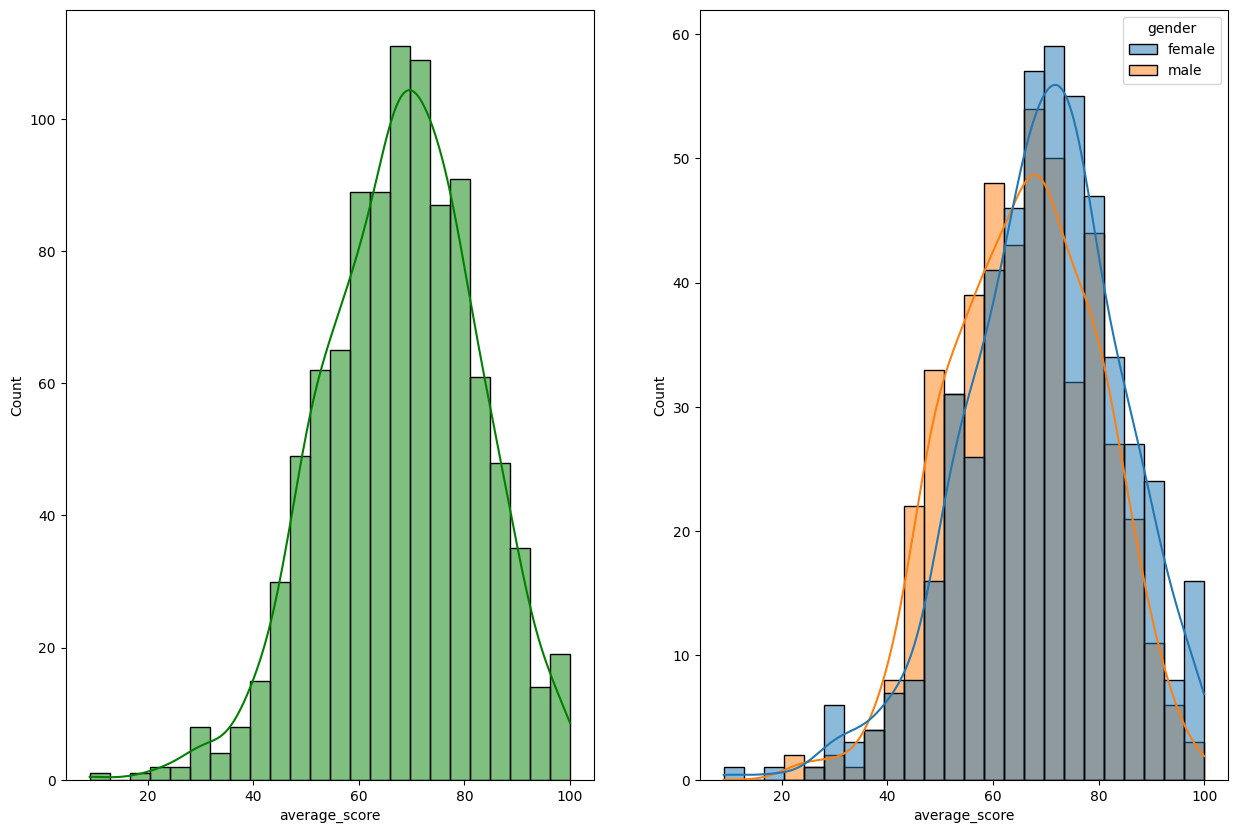

In [29]:
fig,axs = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
sns.histplot(df,x='average_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='average_score',hue='gender',kde=True)
plt.show()

Inference: Female student performing well than male student

<Axes: xlabel='reading_score', ylabel='total_score'>

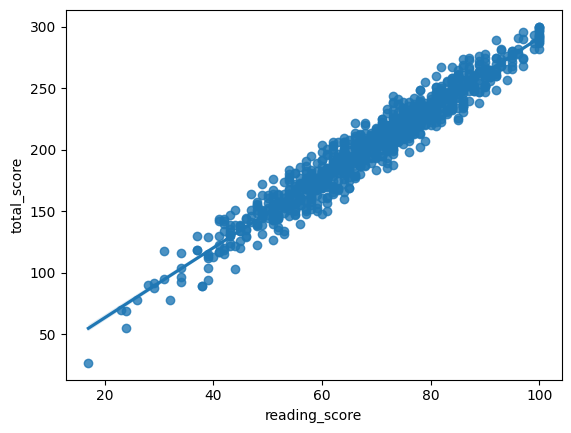

In [33]:
sns.regplot(data=df,x='reading_score',y='total_score')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

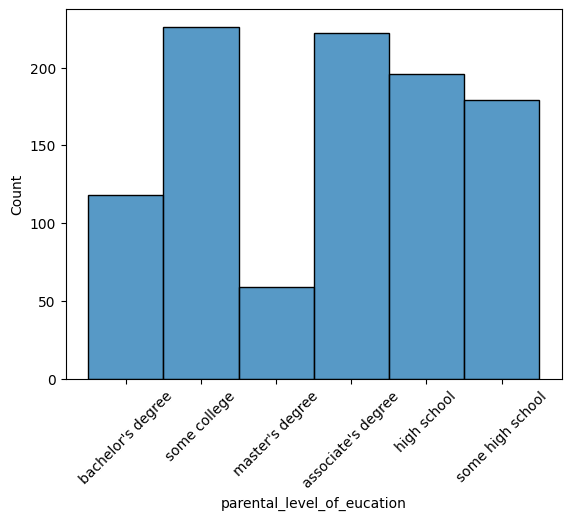

In [42]:
sns.histplot(df,x='parental_level_of_eucation')
plt.xticks(rotation=45)

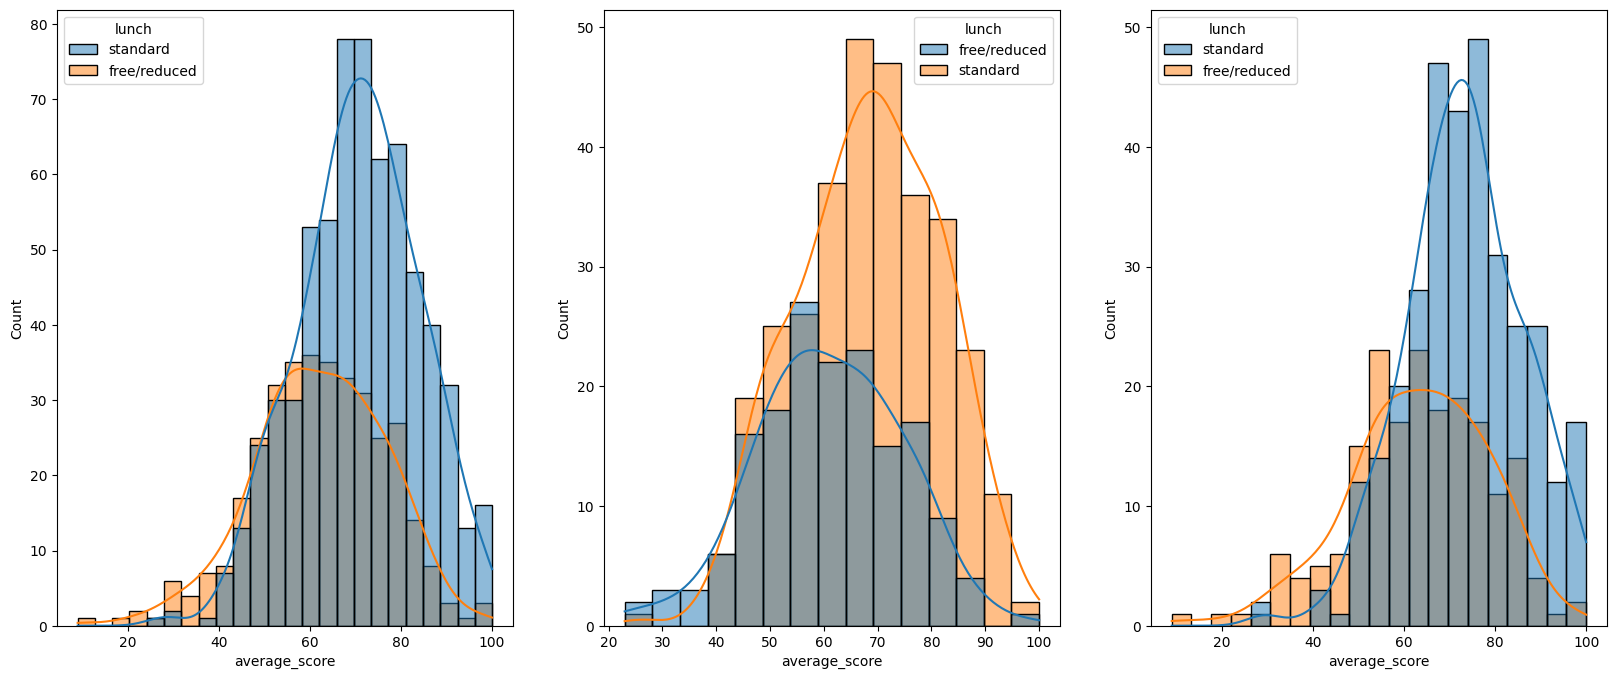

In [51]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.histplot(df,x='average_score',hue='lunch',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='lunch',kde=True)
plt.show()

Insight: Student who got standard launch getting good score than normal

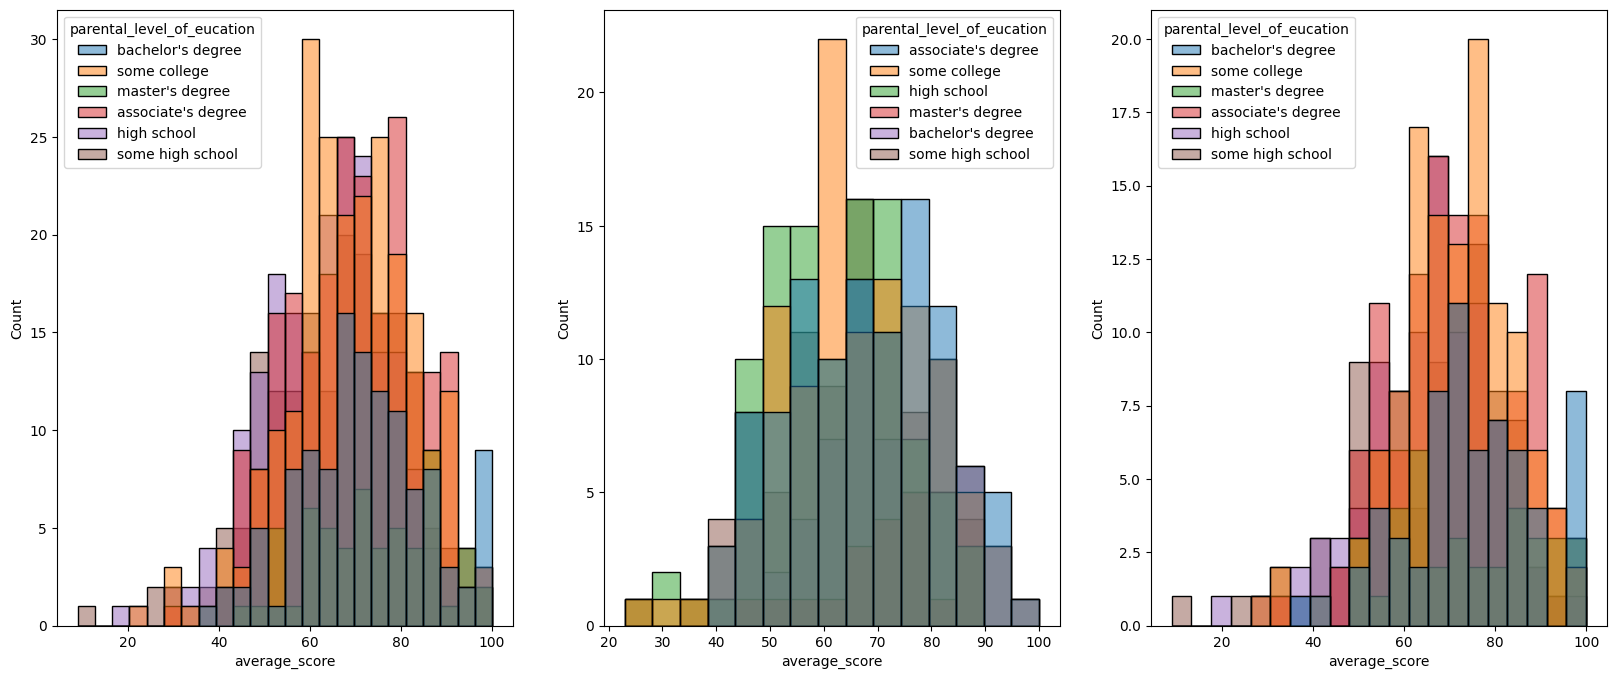

In [54]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.histplot(df,x='average_score',hue='parental_level_of_eucation')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='parental_level_of_eucation')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='parental_level_of_eucation')
plt.show()

Insight:
- parental level of education doesn't affect in exam score of student
- however students of educated parent having good marks in exam 

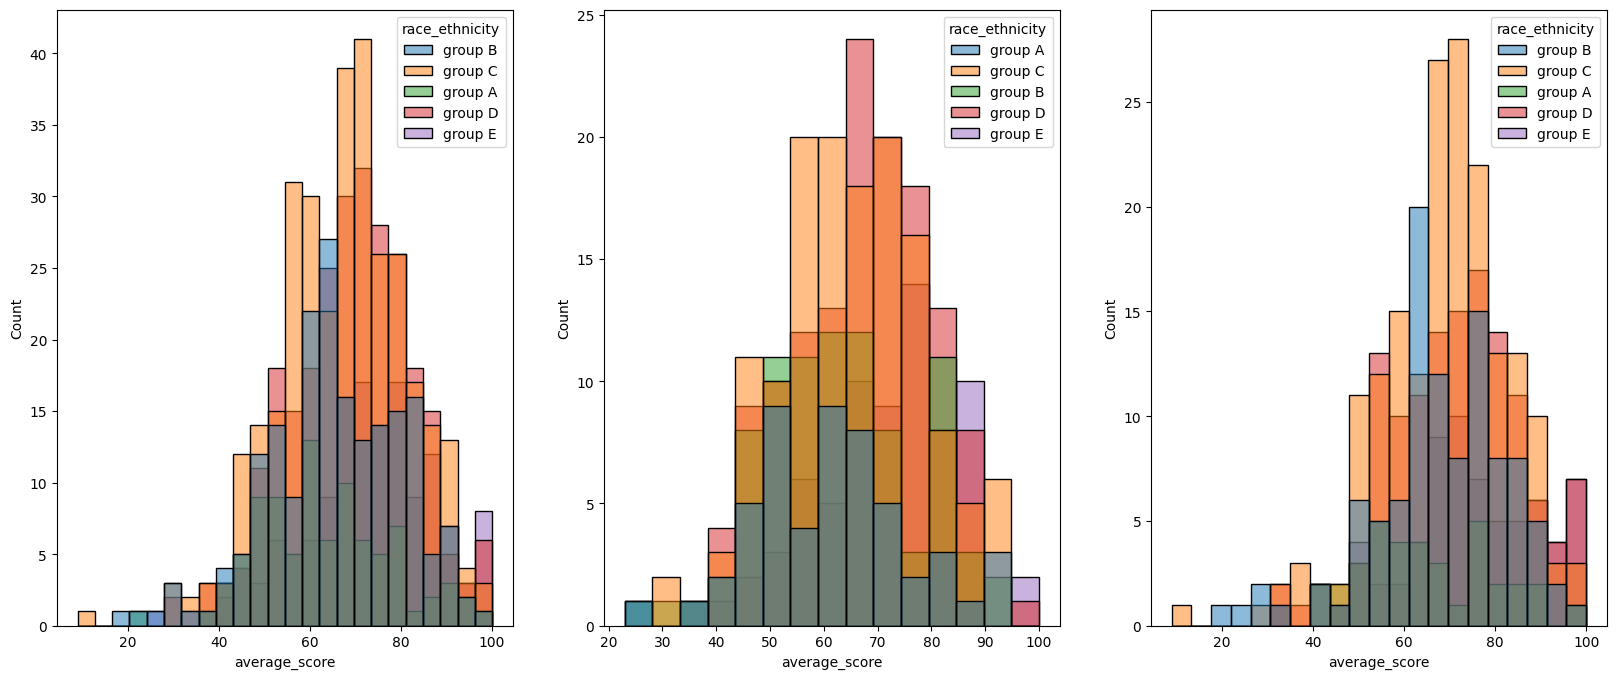

In [55]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.histplot(df,x='average_score',hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='race_ethnicity')
plt.show()

Insight:
- Most of Group A and Group B student are pefroming poor in exam
- Group C and D students are getting good marks in exam but not excellent marks
- since there is no effect for Group E students

<Axes: ylabel='writing_score'>

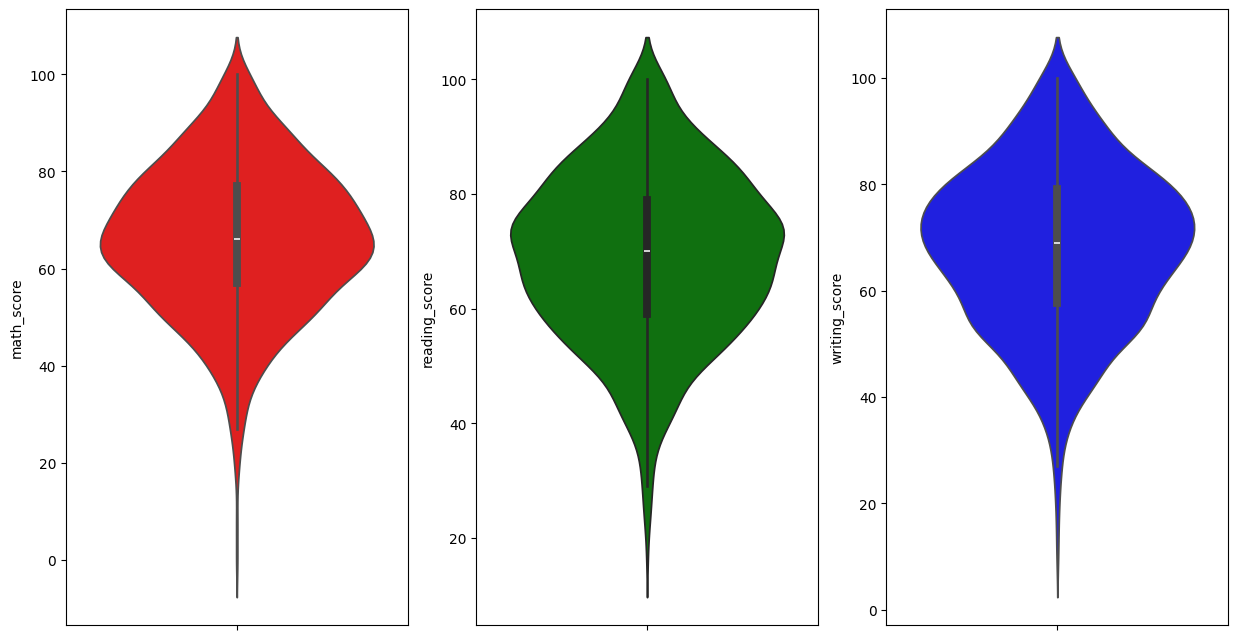

In [60]:
plt.figure(figsize=(15,8))
plt.subplot(131)
sns.violinplot(df,y='math_score',color='red')
plt.subplot(132)
sns.violinplot(df,y='reading_score',color='green')
plt.subplot(133)
sns.violinplot(df,y='writing_score',color='blue')

Insights:Most of the students are getting 60 t0 80 full marks while in reading and writing they got 50-80

## Mulitvariate Analysis using pieplot


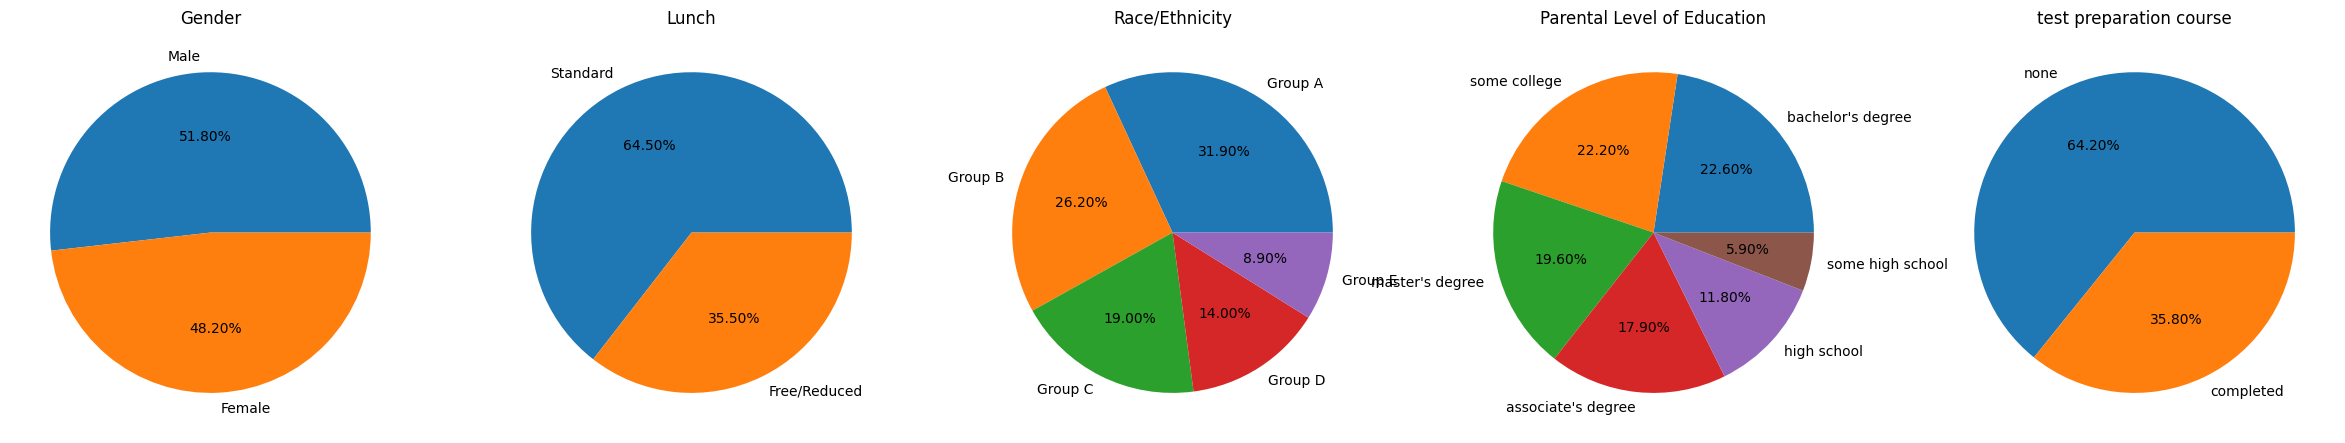

In [81]:
#gender
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(151)
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],autopct='%.2f%%')
plt.title('Gender')

plt.subplot(152)
plt.pie(df['lunch'].value_counts(),labels=['Standard','Free/Reduced'],autopct='%.2f%%')
plt.title('Lunch')

plt.subplot(153)
plt.pie(df['race_ethnicity'].value_counts(),labels=['Group A','Group B','Group C','Group D','Group E'],autopct='%.2f%%')
plt.title('Race/Ethnicity')

plt.subplot(154)
labels = ["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school']
plt.pie(df['parental_level_of_eucation'].value_counts(),labels=labels,autopct='%.2f%%')
plt.title('Parental Level of Education')

plt.subplot(155)
plt.pie(df['test_preparation_course'].value_counts(),labels=['none', 'completed'],autopct='%.2f%%')
plt.title('test preparation course')

plt.show()

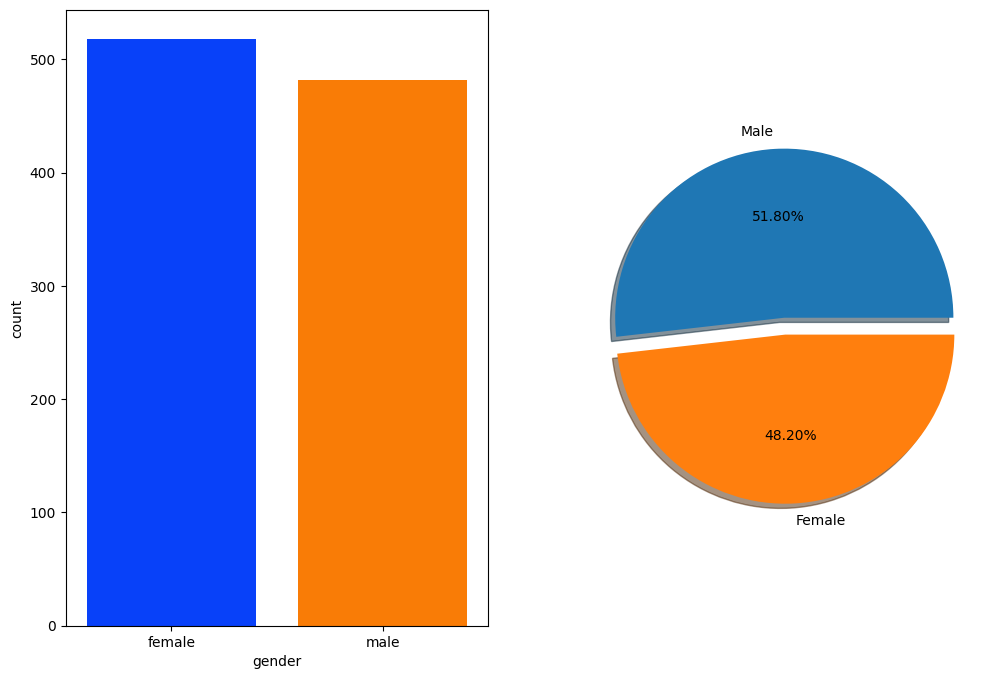

In [39]:
## Univariate analysis
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.countplot(df,x=df['gender'],palette='bright',saturation=0.95)
plt.subplot(122)
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],autopct='%.2f%%',explode=[0,0.1],shadow=True)
plt.show()

### Bivariate analysis ( Is Gender has any impact on student performance?)

In [13]:
gender_group = df.groupby('gender')[['math_score','average_score']].mean()
gender_group

,math_score,average_score
gender,,
female,63.633205,69.569498
male,68.728216,65.837483


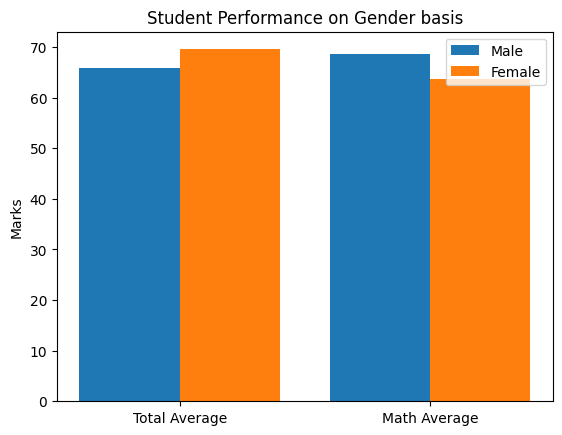

In [23]:
X = ['Total Average','Math Average']
female_score = [gender_group['average_score'][0],gender_group['math_score'][0]]
male_score = [gender_group['average_score'][1],gender_group['math_score'][1]]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_score,0.4,label='Male')
plt.bar(X_axis + 0.2, female_score,0.4,label='Female')
plt.title("Student Performance on Gender basis")
plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.legend()
plt.show()

Insights:
- Compariatively female student are performing well on average marks while male student are good in math 

## Univariate Analysis on Race/Ethnicity 
- Checking Distribution
- impact on student perfromance

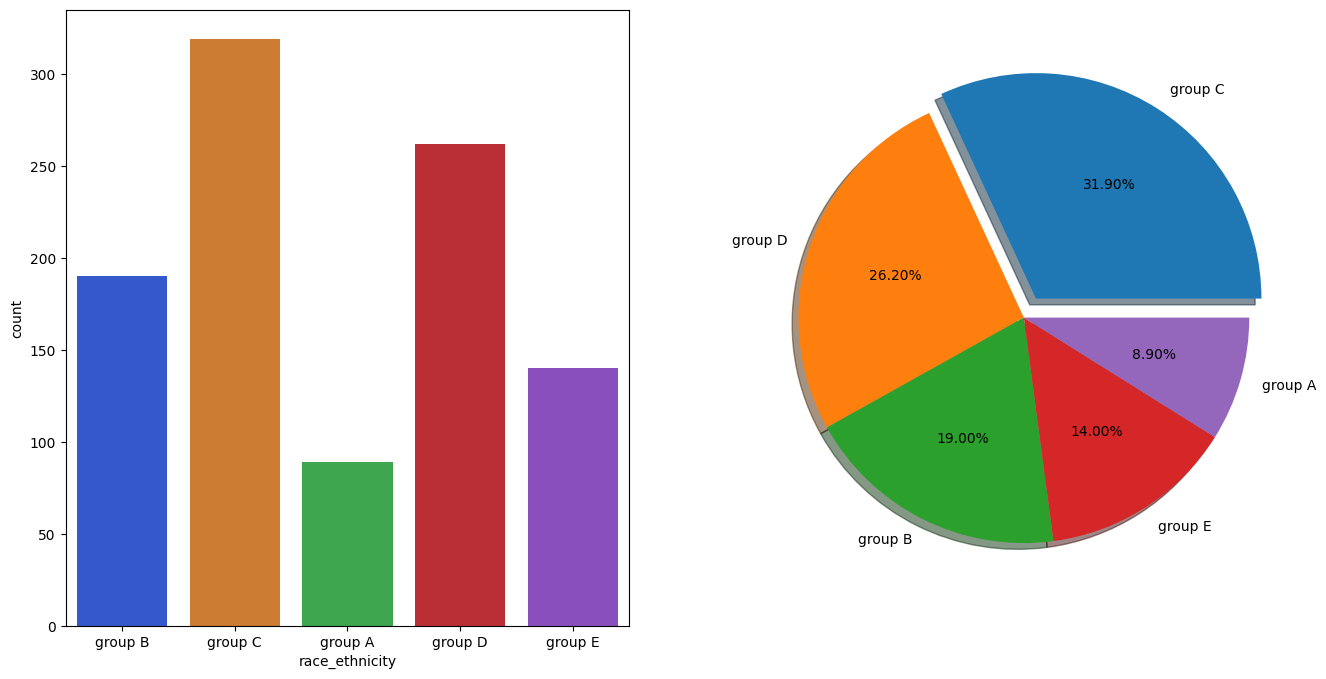

In [38]:
# distribution of race/ethnicity 
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.countplot(df,x=df['race_ethnicity'],palette='bright',saturation=0.6)
plt.subplot(122)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],shadow=True,autopct='%.2f%%')
plt.show()

Insights:
- Group C  and D student are higher in proportion while group A students are least

### Bivariate Analysis: Checking student perfromance 

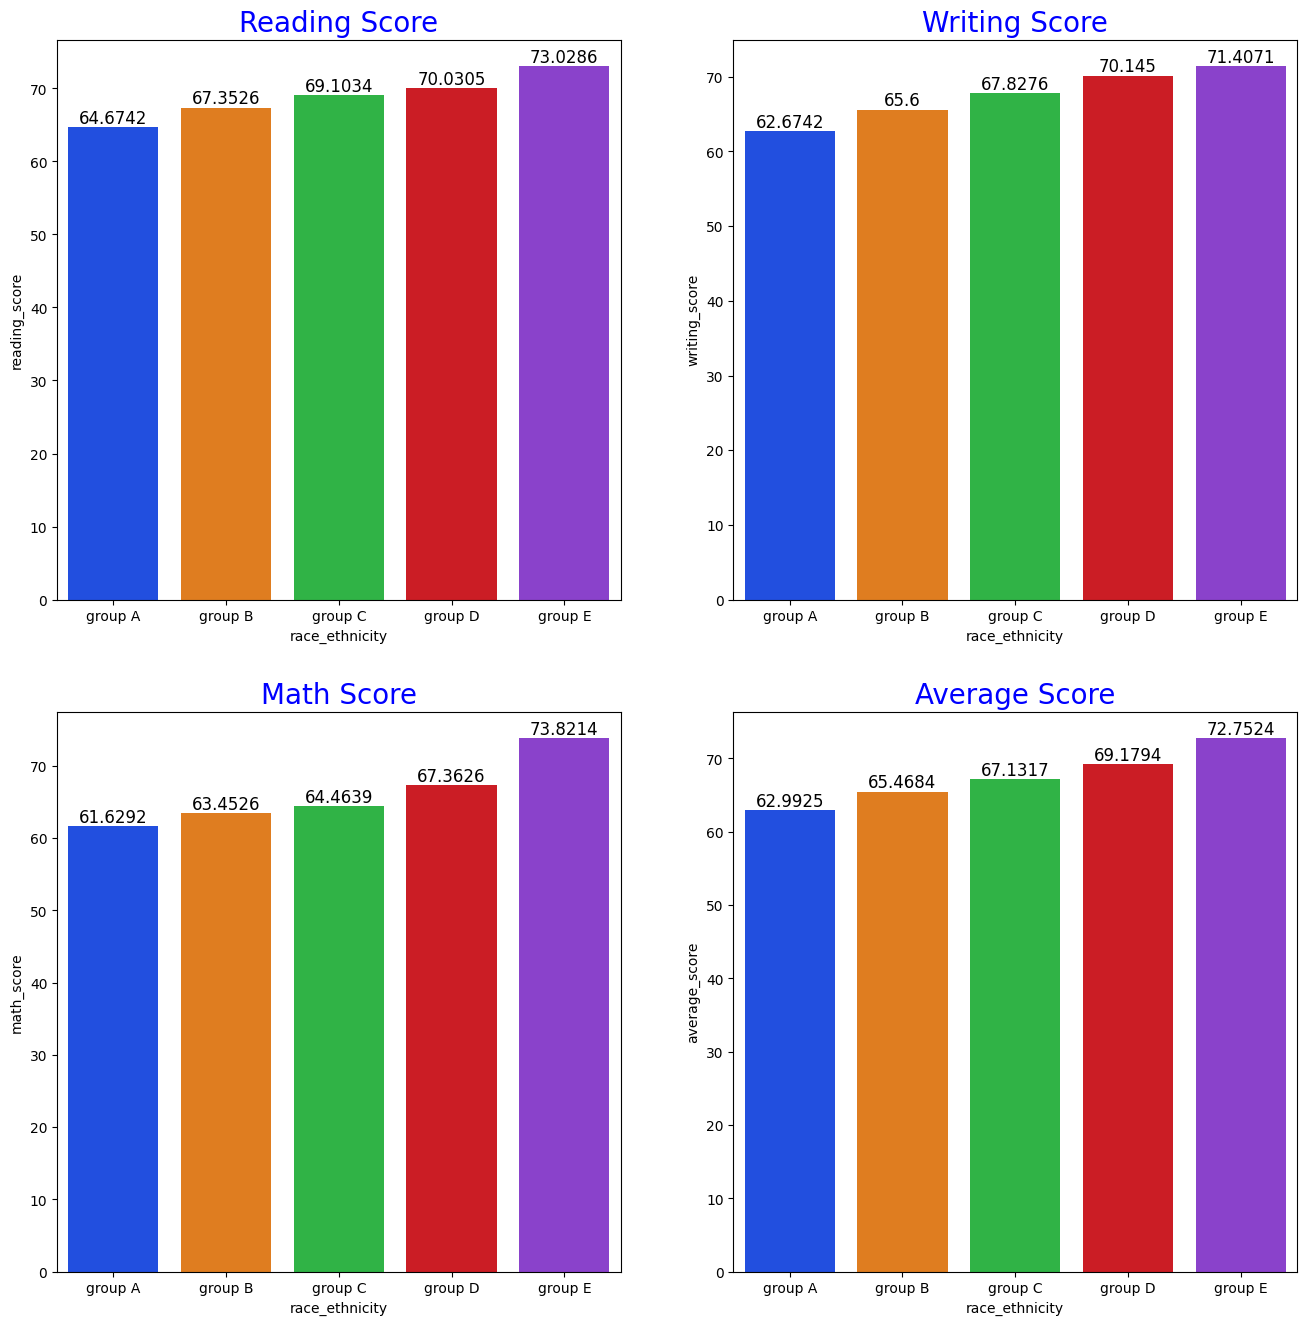

In [61]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
race_group = df.groupby('race_ethnicity')
sns.barplot(x=race_group['reading_score'].mean().index,y=race_group['reading_score'].mean(),palette='bright',ax=ax[0][0])
ax[0][0].set_title('Reading Score',color='blue',size=20)
for container in ax[0][0].containers:
    ax[0][0].bar_label(container,size=12)

sns.barplot(x=race_group['writing_score'].mean().index,y=race_group['writing_score'].mean(),palette='bright',ax=ax[0][1])
ax[0][1].set_title('Writing Score',color='blue',size=20)
for container in ax[0][1].containers:
    ax[0][1].bar_label(container,size=12)

sns.barplot(x=race_group['math_score'].mean().index,y=race_group['math_score'].mean(),palette='bright',ax=ax[1][0])
ax[1][0].set_title('Math Score',color='blue',size=20)
for container in ax[1][0].containers:
    ax[1][0].bar_label(container,size=12)

sns.barplot(x=race_group['average_score'].mean().index,y=race_group['average_score'].mean(),palette='bright',ax=ax[1][1])
ax[1][1].set_title('Average Score',color='blue',size=20)
for container in ax[1][1].containers:
    ax[1][1].bar_label(container,size=12)

Insights:
- Group E's students are scored highest marks in exam  while Group A students scored lowes than others
- In all subject,  scored marks are in range 60-74 on average 


## PARENT LEVEL OF EDUCATIOn 
- Distribution 
- Is it impact on student performance?

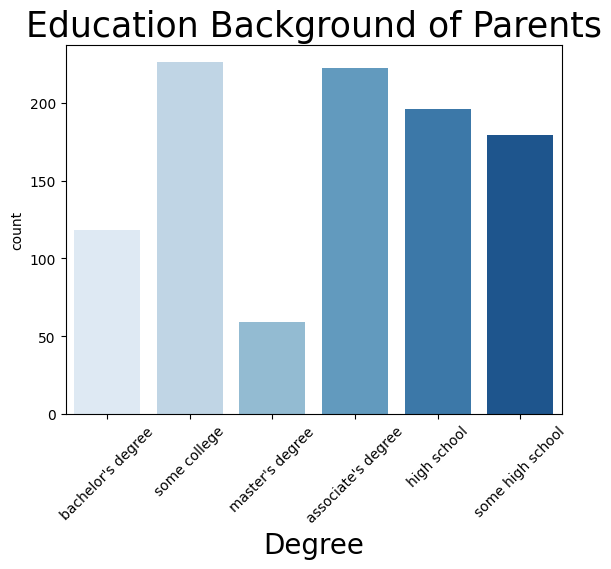

In [66]:
# Univariate analysis
sns.countplot(x=df['parental_level_of_eucation'],palette='Blues')
plt.xticks(rotation = 45)
plt.title('Education Background of Parents',size=25)
plt.xlabel('Degree',size=20)
plt.show()

Insights: Largest numbers of parents are from some college while only least of student's are having master degree

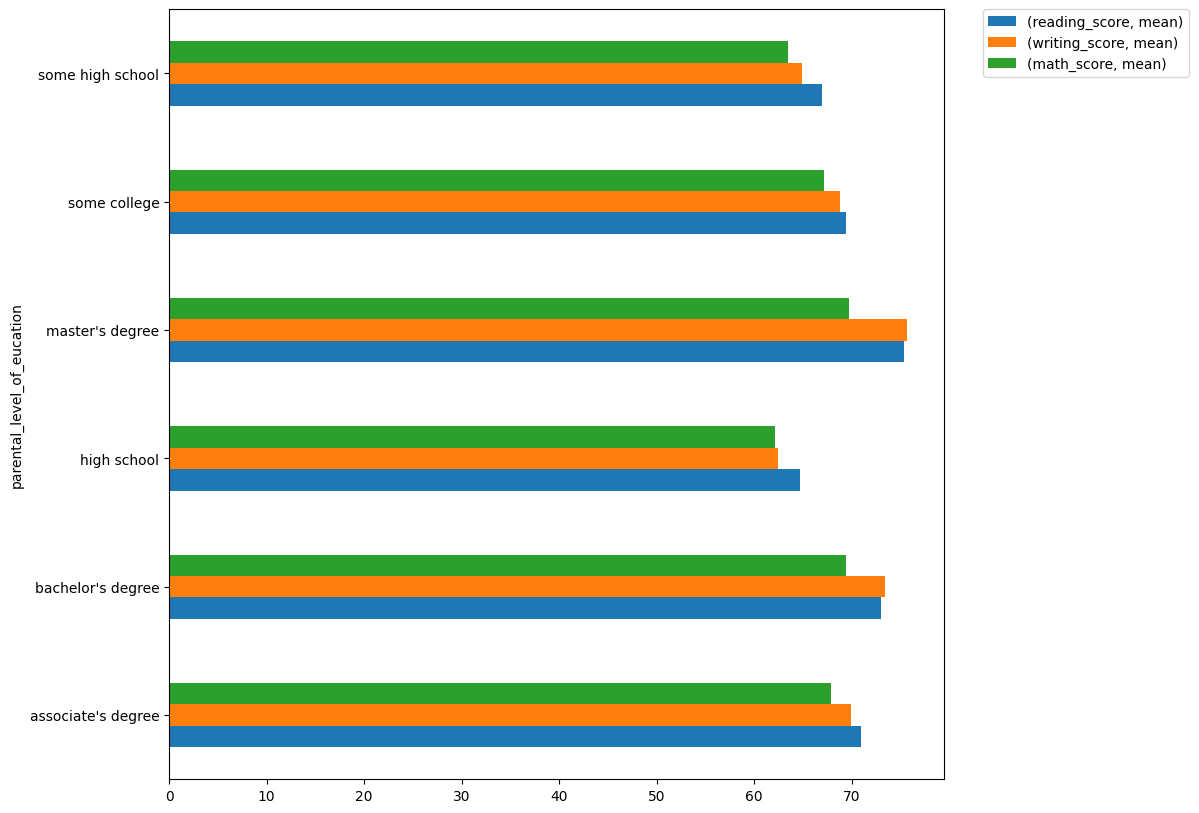

In [87]:
#Bivariate analysis : Performance of student based on their parent education 
df.groupby('parental_level_of_eucation')[['reading_score','writing_score','math_score']].agg(['mean']).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()


Insights: Students whose parent do master degree are good in reading/Writing while in math there is no effect except student's whose parent  are having degree of high school 

In [68]:
## Launch 


Index(['gender', 'race_ethnicity', 'parental_level_of_eucation', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

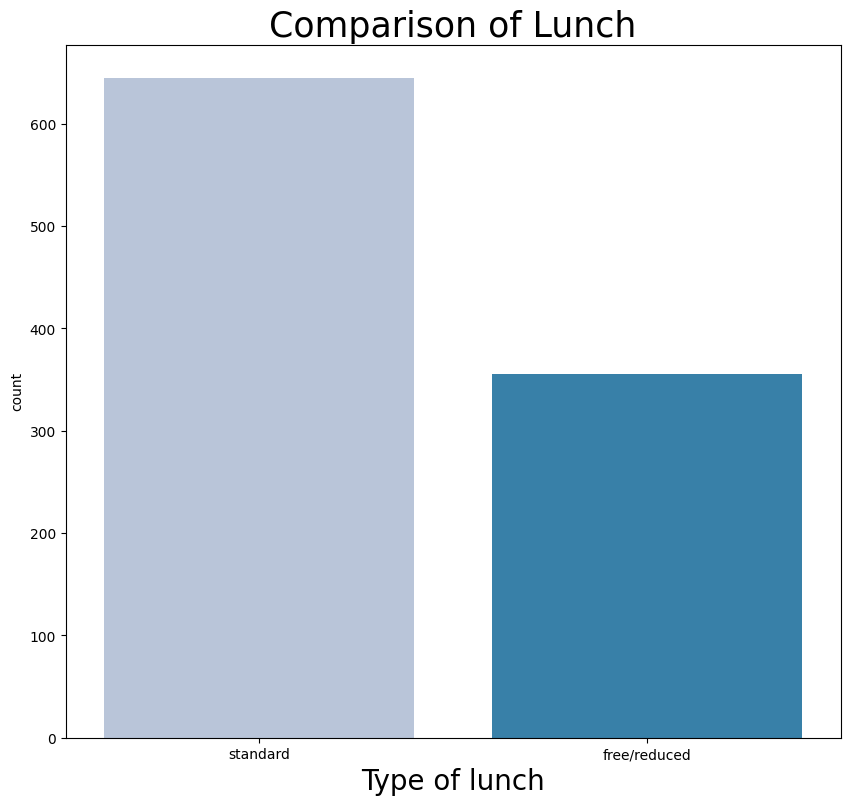

In [100]:
plt.rcParams['figure.figsize'] = (10, 9)
sns.countplot(x=df['lunch'],palette='PuBu')
plt.title('Comparison of Lunch',size=25)
plt.xlabel('Type of lunch',size=20)
plt.show()


Insights: Most of student are having standard lunch 

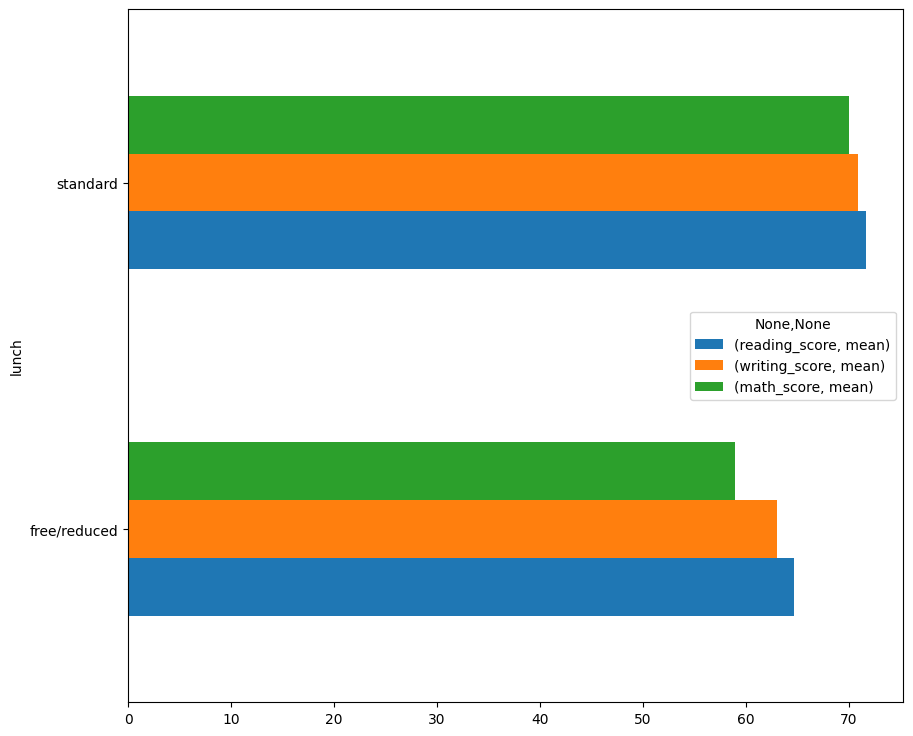

In [102]:
df.groupby('lunch')[['reading_score','writing_score','math_score']].agg(['mean']).plot(kind='barh')
plt.show()

Insights: Student who intak standard lunch are scored higher marks comparison to free/reduced

## Is Test Preparation course support in Scoring marks?

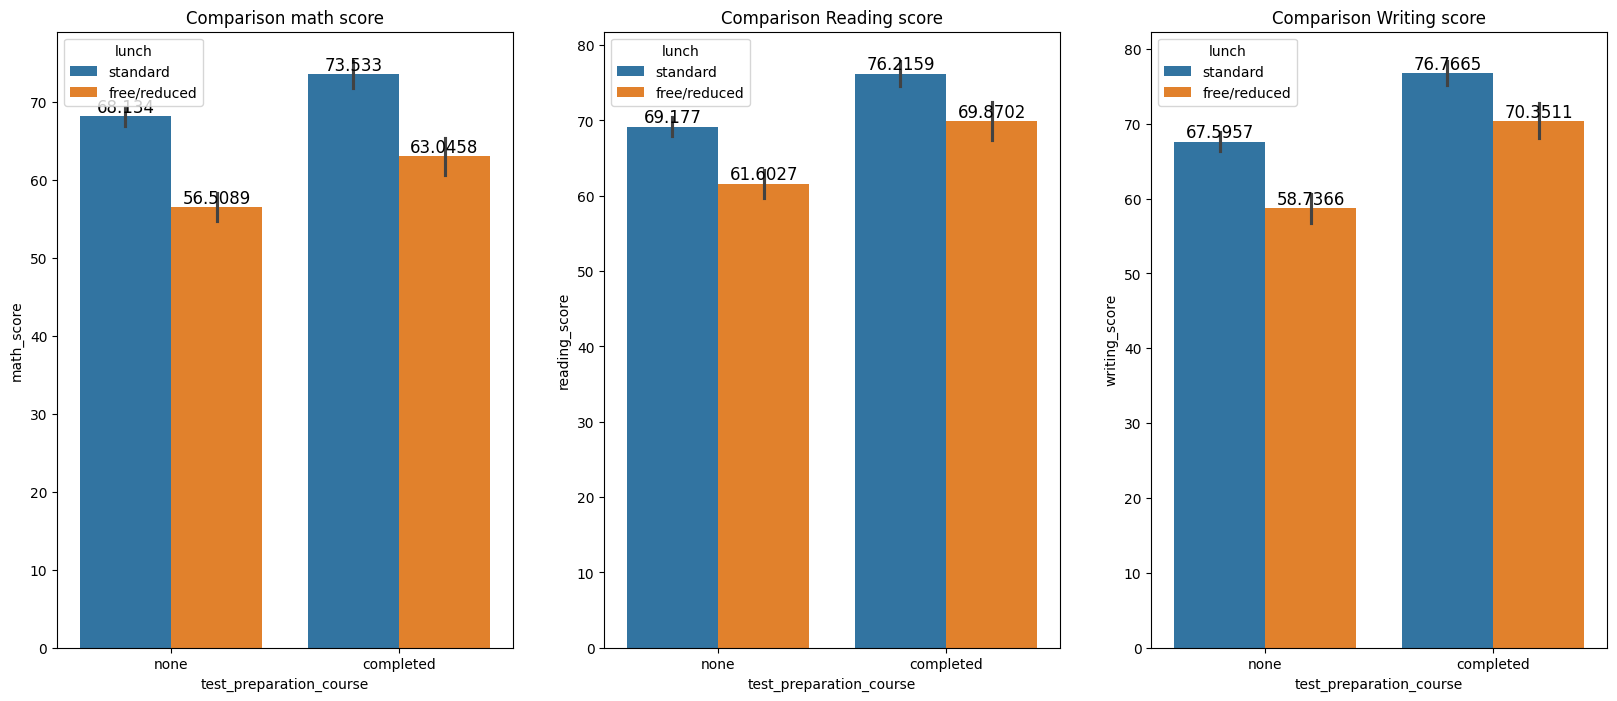

In [107]:
fig,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=df['test_preparation_course'],y=df['math_score'],hue=df['lunch'],ax=ax[0])
ax[0].set_title('Comparison math score')
for container in ax[0].containers:
    ax[0].bar_label(container,size=12)

sns.barplot(x=df['test_preparation_course'],y=df['reading_score'],hue=df['lunch'],ax=ax[1])
ax[1].set_title('Comparison Reading score')
for container in ax[1].containers:
    ax[1].bar_label(container,size=12)

sns.barplot(x=df['test_preparation_course'],y=df['writing_score'],hue=df['lunch'],ax=ax[2])
ax[2].set_title('Comparison Writing score')
for container in ax[2].containers:
    ax[2].bar_label(container,size=12)

### Insights:
- Test preparation improves writing scores:
    - Students who completed the test preparation course scored notably higher in writing, showing a clear benefit from the course.
- Standard lunch + test prep = highest performance:
    - Students who took standard lunch and completed the test preparation scored about 5 points higher on average compared to others.
- Standard lunch alone helps — but test prep is key:
    - Even students with standard lunch but no test prep scored reasonably well, but those with both advantages (standard lunch + test prep) performed best overall.


<Axes: ylabel='writing_score'>

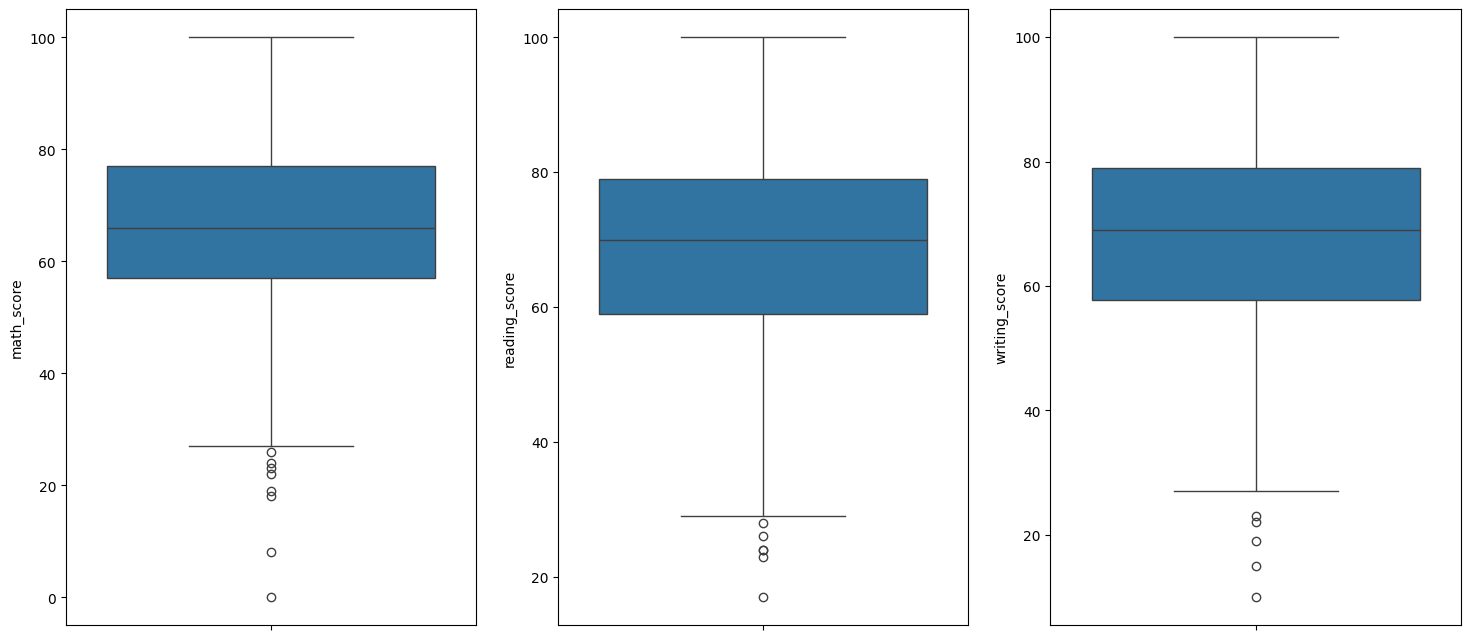

In [115]:
## Checking outliers
plt.subplots(1,3,figsize=(18,8))
plt.subplot(131)
sns.boxplot(df,y='math_score')
plt.subplot(132)
sns.boxplot(df,y='reading_score')
plt.subplot(133)
sns.boxplot(df,y='writing_score')

## Multivariate analysis using pariplot

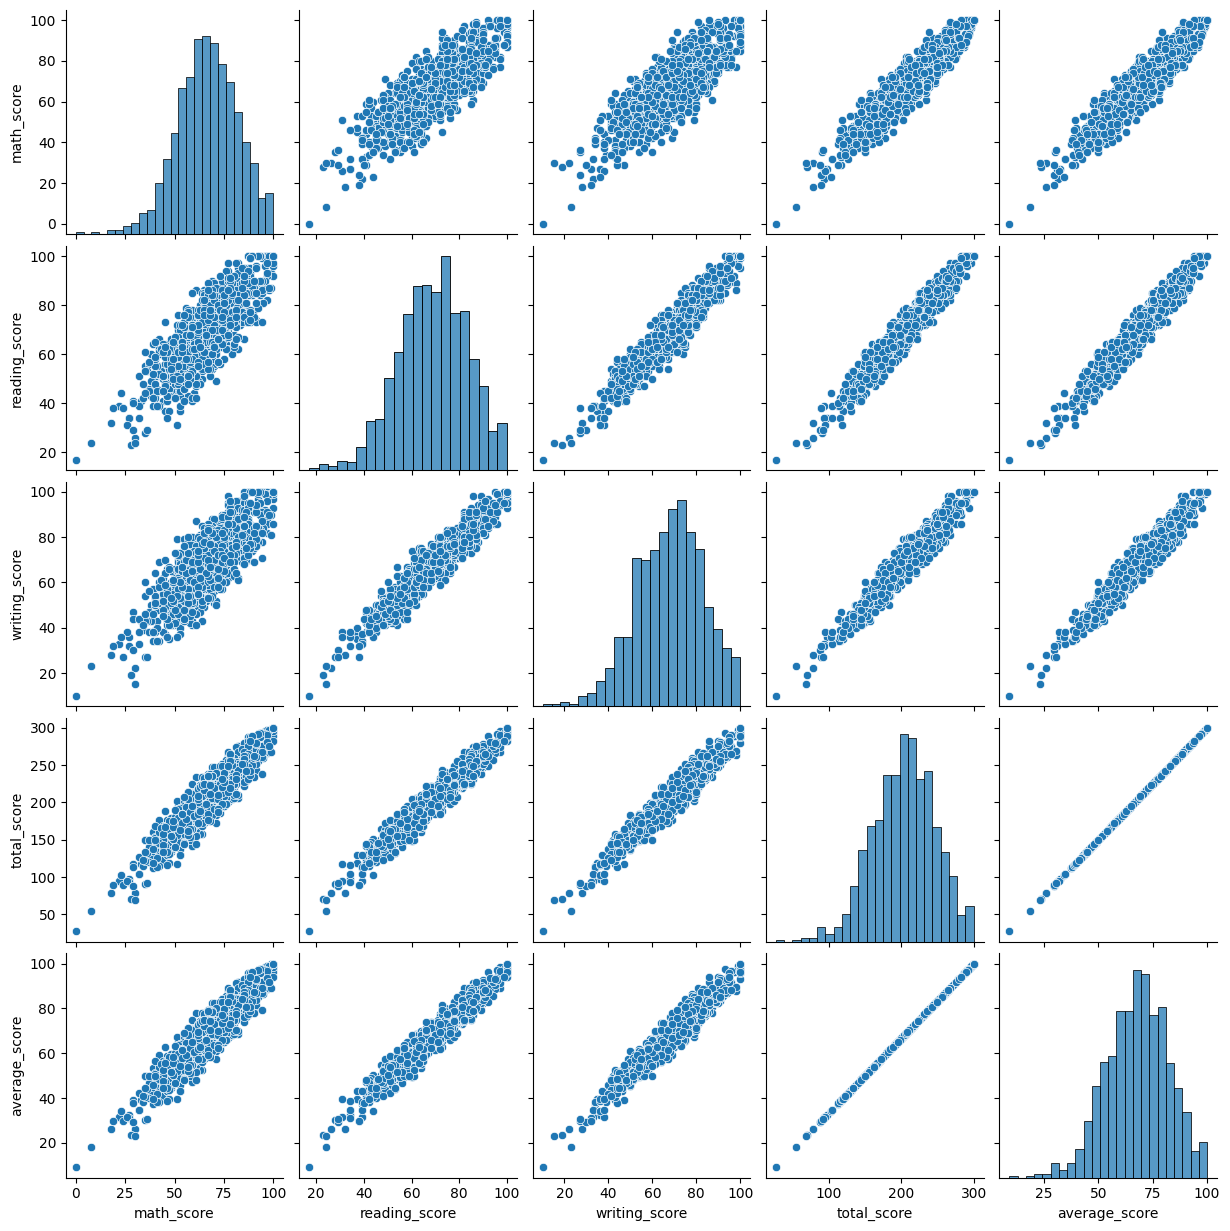

In [118]:
sns.pairplot(df)


Insight: Linear growth 

#### Final Conclusion 
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.